#Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import  ConfusionMatrixDisplay,confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

#Loading Data

In [4]:
df = pd.read_csv('magic04.csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9,10
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [5]:
df.columns = ['fLength',
              'fWidth',
              'fSize',
              'fConc',
              'fConc1', 
              'fAsym',
              'fM3Long',
              'fM3Trans',
              'fAlpha',
              'fDist',
              'classified']
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,classified
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [6]:
df.classified.value_counts()

g    12332
h     6688
Name: classified, dtype: int64

#Balancing Data

In [7]:
df = df.groupby('classified')
df = df.apply(lambda x: x.sample(df.size().min()).reset_index(drop=True))
df.classified.value_counts()

g    6688
h    6688
Name: classified, dtype: int64

#Data Splitting


In [9]:
X = df.drop(columns=['classified'])
y= df['classified']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = None)

In [11]:
def evaluate(X_test, y_test, model):
    y_pred= model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return y_pred, accuracy, precision, recall, f1

#Decision Trees

Decision Trees Accuracy:  79.11786693246947 %
Decision Trees Precision:  79.1671432473046 %
Decision Trees Recall:  79.11786693246947 %
Decision Trees F1 score:  79.11702667239217 %


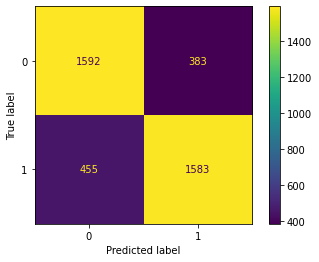

In [12]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree_y_pred, dtree_accuracy, dtree_precision, dtree_recall, dtree_f1 = evaluate(X_test,y_test, dtree)
print("Decision Trees Accuracy: ", dtree_accuracy*100, "%")
print("Decision Trees Precision: ", dtree_precision*100, "%")
print("Decision Trees Recall: ", dtree_recall*100, "%")
print("Decision Trees F1 score: ", dtree_f1*100, "%")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, dtree_y_pred))
disp.plot()
plt.show()

In [ ]:
print(cross_val_score(dtree, X_train, y_train, cv=5, scoring = 'accuracy'))

[0.7923118  0.79391351 0.78804058 0.79166667 0.78365385]


#Naive Bayes

Naive Bayes Accuracy:  64.86419137802143 %
Naive Bayes Precision:  69.95781423888899 %
Naive Bayes Recall:  64.86419137802143 %
Naive Bayes F1 score:  62.32665365135354 %


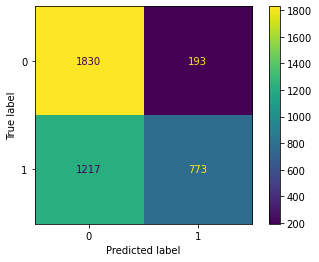

In [ ]:
Naive_Bayes = GaussianNB()
Naive_Bayes.fit(X_train, y_train)
naive_y_pred, naive_accuracy, naive_precision, naive_recall, naive_f1 = evaluate(X_test,y_test, Naive_Bayes)
print("Naive Bayes Accuracy: ", naive_accuracy*100, "%")
print("Naive Bayes Precision: ", naive_precision*100, "%")
print("Naive Bayes Recall: ", naive_recall*100, "%")
print("Naive Bayes F1 score: ", naive_f1*100, "%")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, naive_y_pred))
disp.plot()
plt.show()

In [ ]:
print(cross_val_score(Naive_Bayes, X_train, y_train, cv=5, scoring = 'accuracy'))

[0.64281901 0.66684463 0.65776829 0.64102564 0.64583333]


#KNN

KNN Accuracy:  76.07774732120608 %
KNN Precision:  76.44565707756152 %
KNN Recall:  76.07774732120608 %
KNN F1 score:  75.97686675549787 %


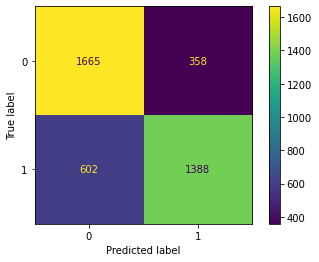

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn=knn.fit(X_train,y_train)
knn_y_pred, knn_accuracy, knn_precision, knn_recall, knn_f1 = evaluate(X_test,y_test, knn)
print("KNN Accuracy: ", knn_accuracy*100, "%")
print("KNN Precision: ", knn_precision*100, "%")
print("KNN Recall: ", knn_recall*100, "%")
print("KNN F1 score: ", knn_f1*100, "%")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, knn_y_pred))
disp.plot()
plt.show()

In [ ]:
print(cross_val_score(knn, X_train, y_train, cv=5, scoring = 'accuracy'))

[0.76187934 0.77148959 0.76294714 0.76816239 0.76762821]


#Using Grid SearchCV to find the best estimators

In [ ]:
parameters = {'n_neighbors':[1,3,5,7,9,11,13,15], 'p':[1, 2,3]}
gsv = GridSearchCV(knn,param_grid = parameters)
gsv = gsv.fit(X_train, y_train)
gsv.cv_results_
gsv.best_params_
knn_gsv =gsv.best_estimator_


In [ ]:
gsv.best_params_

{'n_neighbors': 11, 'p': 1}

#Highest Accuracy reached when number of neighbours is 11

KNN GSV Accuracy:  78.51981061549964 %
KNN GSV Precision:  79.60757433698954 %
KNN GSV Recall:  78.51981061549964 %
KNN GSV F1 score:  78.29729674175199 %


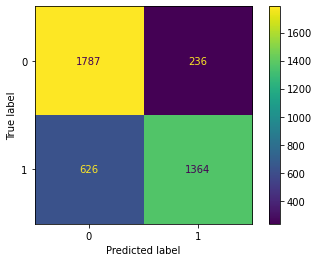

In [ ]:
knn_gsv_y_pred, knn_gsv_accuracy, knn_gsv_precision, knn_gsv_recall, knn_gsv_f1 = evaluate(X_test,y_test, knn_gsv)
print("KNN GSV Accuracy: ", knn_gsv_accuracy*100, "%")
print("KNN GSV Precision: ", knn_gsv_precision*100, "%")
print("KNN GSV Recall: ", knn_gsv_recall*100, "%")
print("KNN GSV F1 score: ", knn_gsv_f1*100, "%")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, knn_gsv_y_pred))
disp.plot()
plt.show()

In [ ]:
print(cross_val_score(knn_gsv, X_train, y_train, cv=5, scoring = 'accuracy'))

[0.77736252 0.77736252 0.77949813 0.78151709 0.77457265]


#AdaBoost

AdaBoost Accuracy:  82.50685272863194 %
AdaBoost Precision:  82.52818632412254 %
AdaBoost Recall:  82.50685272863194 %
AdaBoost F1 score:  82.5014361964065 %


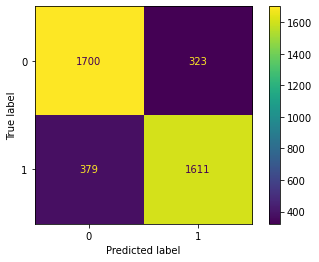

In [ ]:
adaboost = AdaBoostClassifier(n_estimators=100, random_state=0)
adaboost=adaboost.fit(X_train,y_train)
adaboost_y_pred, adaboost_accuracy, adaboost_precision, adaboost_recall, adaboost_f1 = evaluate(X_test,y_test, adaboost)
print("AdaBoost Accuracy: ", adaboost_accuracy*100, "%")
print("AdaBoost Precision: ", adaboost_precision*100, "%")
print("AdaBoost Recall: ", adaboost_recall*100, "%")
print("AdaBoost F1 score: ", adaboost_f1*100, "%")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, adaboost_y_pred))
disp.plot()
plt.show()

In [ ]:
print(cross_val_score(adaboost, X_train, y_train, cv=5, scoring = 'accuracy'))

[0.82274426 0.82754939 0.82327816 0.82318376 0.82211538]


In [ ]:
parameters = {'n_estimators':[ 5,10,20,50, 100 , 200,500]}
gsv2 = GridSearchCV(adaboost,param_grid = parameters)
gsv2 = gsv2.fit(X_train, y_train)
gsv2.cv_results_
gsv2.best_params_
adaboost_gsv =gsv2.best_estimator_

In [ ]:
gsv2.best_params_

{'n_estimators': 500}

AdaBoost GSV Accuracy:  83.50361325691502 %
AdaBoost GSV Precision:  83.52955272366889 %
AdaBoost GSV Recall:  83.50361325691502 %
AdaBoost GSV F1 score:  83.49789428430483 %


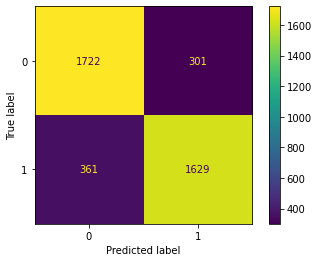

In [ ]:
adaboost_gsv_y_pred, adaboost_gsv_accuracy, adaboost_gsv_precision, adaboost_gsv_recall, adaboost_gsv_f1 = evaluate(X_test,y_test, adaboost_gsv)
print("AdaBoost GSV Accuracy: ", adaboost_gsv_accuracy*100, "%")
print("AdaBoost GSV Precision: ", adaboost_gsv_precision*100, "%")
print("AdaBoost GSV Recall: ", adaboost_gsv_recall*100, "%")
print("AdaBoost GSV F1 score: ", adaboost_gsv_f1*100, "%")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, adaboost_gsv_y_pred))
disp.plot()
plt.show()

In [ ]:
print(cross_val_score(adaboost_gsv, X_train, y_train, cv=5, scoring = 'accuracy'))

[0.83502403 0.82754939 0.81580352 0.8215812  0.82799145]


#Random Forest Classifier

Random Forest Accuracy:  86.79292300024919 %
Random Forest Precision:  86.91432926482943 %
Random Forest Recall:  86.79292300024919 %
Random Forest F1 score:  86.77828968684067 %


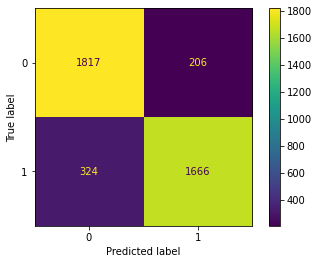

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=0)
random_forest=random_forest.fit(X_train,y_train)
random_forest_y_pred, random_forest_accuracy, random_forest_precision, random_forest_recall, random_forest_f1 = evaluate(X_test,y_test, random_forest)
print("Random Forest Accuracy: ", random_forest_accuracy*100, "%")
print("Random Forest Precision: ", random_forest_precision*100, "%")
print("Random Forest Recall: ", random_forest_recall*100, "%")
print("Random Forest F1 score: ", random_forest_f1*100, "%")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, random_forest_y_pred))
disp.plot()
plt.show()


In [ ]:
print(cross_val_score(random_forest, X_train, y_train, cv=5, scoring = 'accuracy'))

[0.85691404 0.86492258 0.85691404 0.85470085 0.84882479]


In [ ]:
parameters = {'n_estimators':[ 5,10,20,50, 100 , 200,500]}
gsv3 = GridSearchCV(random_forest,param_grid = parameters)
gsv3 = gsv3.fit(X_train, y_train)
gsv3.best_params_
random_forest_gsv =gsv3.best_estimator_

In [ ]:
gsv3.best_params_

{'n_estimators': 200}

Random Forest GSV Accuracy:  86.86768003987042 %
Random Forest GSV Precision:  86.98309169971525 %
Random Forest GSV Recall:  86.86768003987042 %
Random Forest GSV F1 score:  86.8537819921936 %


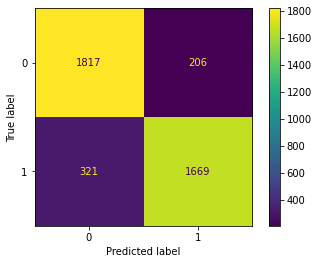

In [ ]:
random_forest_gsv_y_pred, random_forest_gsv_accuracy, random_forest_gsv_precision, random_forest_gsv_recall, random_forest_gsv_f1 = evaluate(X_test,y_test, random_forest_gsv)
print("Random Forest GSV Accuracy: ", random_forest_gsv_accuracy*100, "%")
print("Random Forest GSV Precision: ", random_forest_gsv_precision*100, "%")
print("Random Forest GSV Recall: ", random_forest_gsv_recall*100, "%")
print("Random Forest GSV F1 score: ", random_forest_gsv_f1*100, "%")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, random_forest_gsv_y_pred))
disp.plot()
plt.show()

In [ ]:
print(cross_val_score(random_forest_gsv, X_train, y_train, cv=5, scoring = 'accuracy'))

[0.85424453 0.8670582  0.85744794 0.8616453  0.85149573]


#Neural Network

In [93]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn import preprocessing
from torch.utils.data import Dataset, DataLoader

In [106]:
X_train_ts = torch.from_numpy(X_train.values).float()
X_test_ts = torch.from_numpy(X_test.values).float()

In [122]:
le = preprocessing.LabelEncoder()
y_train_encoded_ts = le.fit_transform(y_train)
y_test_encoded_ts = le.fit_transform(y_test)

In [120]:

y_train_encoded_ts = torch.from_numpy(y_train_encoded_ts).float()
y_test_encoded_ts = torch.from_numpy(y_test_encoded_ts).float()

In [109]:
print(X_train_ts.shape)
print(X_test_ts.shape)

torch.Size([9363, 10])
torch.Size([4013, 10])


In [123]:
class Data(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X.values).float()
        self.y = torch.from_numpy(y).float()
        self.len = self.X.shape[0]
       
    def __getitem__(self, index):
        return self.X[index], self.y[index]
   
    def __len__(self):
        return self.len
   
batch_size = 64

# Instantiate training and test data
train_data = Data(X_train, y_train_encoded_ts)
train_dataloader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

test_data = Data(X_test, y_test_encoded_ts)
test_dataloader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=True)

# Check it's working
for batch, (X, y) in enumerate(train_dataloader):
    print(f"Batch: {batch+1}")
    print(f"X shape: {X.shape}")
    print(f"y shape: {y.shape}")
    break


Batch: 1
X shape: torch.Size([64, 10])
y shape: torch.Size([64])


In [80]:
class NeuralNetwork(nn.Module):
    def __init__(self, hidden_layer1, hidden_layer2):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.l1 = nn.Linear(10, hidden_layer1)
        self.l2 = nn.Linear(hidden_layer1, hidden_layer2)
        self.out = nn.Linear(hidden_layer2, 1)
        

    def forward(self, data):
        x = self.l1(data)
        x = torch.relu(x)
        x = self.l2(x)
        x = torch.relu(x)
        x = self.out(x)
        return torch.sigmoid(x)

In [87]:
NeuralNetwork_Model1 = NeuralNetwork(32,64)
print(NeuralNetwork_Model1)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (l1): Linear(in_features=10, out_features=32, bias=True)
  (l2): Linear(in_features=32, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=1, bias=True)
)


In [102]:
criterion=nn.BCELoss()
optimizer=torch.optim.SGD(NeuralNetwork_Model1.parameters(), lr=0.1)
EPOCHS= 20
BATCH_SIZE = 64

In [103]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print("[INFO] training using {}...".format(DEVICE))

[INFO] training using cpu...


In [130]:
for epoch in range(500):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = NeuralNetwork_Model1(inputs)
        loss = criterion(outputs.reshape(labels.shape), labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
        running_loss = 0.0
       
            

print('Finished Training')

Streaming output truncated to the last 5000 lines.
[466,   147] loss: 0.024
[467,     1] loss: 0.022
[467,     2] loss: 0.026
[467,     3] loss: 0.030
[467,     4] loss: 0.021
[467,     5] loss: 0.022
[467,     6] loss: 0.028
[467,     7] loss: 0.024
[467,     8] loss: 0.024
[467,     9] loss: 0.023
[467,    10] loss: 0.027
[467,    11] loss: 0.025
[467,    12] loss: 0.025
[467,    13] loss: 0.029
[467,    14] loss: 0.019
[467,    15] loss: 0.023
[467,    16] loss: 0.025
[467,    17] loss: 0.030
[467,    18] loss: 0.023
[467,    19] loss: 0.021
[467,    20] loss: 0.028
[467,    21] loss: 0.029
[467,    22] loss: 0.024
[467,    23] loss: 0.027
[467,    24] loss: 0.024
[467,    25] loss: 0.027
[467,    26] loss: 0.026
[467,    27] loss: 0.024
[467,    28] loss: 0.025
[467,    29] loss: 0.024
[467,    30] loss: 0.027
[467,    31] loss: 0.028
[467,    32] loss: 0.027
[467,    33] loss: 0.025
[467,    34] loss: 0.027
[467,    35] loss: 0.027
[467,    36] loss: 0.025
[467,    37] loss: 0.027

In [131]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in test_dataloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = NeuralNetwork_Model1(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network: {100 * correct // total} %')

Accuracy of the network: 50 %


#Not the best accuracy I know :( first time using pytorch

#Keras

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn import preprocessing

In [ ]:
le = preprocessing.LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.fit_transform(y_test)

In [ ]:
def CreateModel(hidden_layer1, hidden_layer2):
  model = Sequential()
  model.add(Dense(hidden_layer1,activation='relu'))
  model.add(Dense(hidden_layer2, activation='relu'))
  model.add(Dense(1, activation = 'sigmoid'))
  return model
        

In [ ]:
Neural_Network1 = CreateModel(16,32)
Neural_Network1.compile(loss='binary_crossentropy', metrics=['accuracy'])
Neural_Network1.fit(X_train,y_train_encoded,epochs=300,batch_size=10)

Epoch 1/300
937/937 [==============================] - 3s 2ms/step - loss: 0.7806 - accuracy: 0.6618
Epoch 2/300
937/937 [==============================] - 2s 2ms/step - loss: 0.5744 - accuracy: 0.7197
Epoch 3/300
937/937 [==============================] - 2s 2ms/step - loss: 0.5397 - accuracy: 0.7361
Epoch 4/300
937/937 [==============================] - 3s 3ms/step - loss: 0.5086 - accuracy: 0.7515
Epoch 5/300
937/937 [==============================] - 2s 2ms/step - loss: 0.4924 - accuracy: 0.7634
Epoch 6/300
937/937 [==============================] - 2s 2ms/step - loss: 0.4814 - accuracy: 0.7693
Epoch 7/300
937/937 [==============================] - 2s 2ms/step - loss: 0.4759 - accuracy: 0.7715
Epoch 8/300
937/937 [==============================] - 2s 2ms/step - loss: 0.4620 - accuracy: 0.7819
Epoch 9/300
937/937 [==============================] - 2s 2ms/step - loss: 0.4621 - accuracy: 0.7822
Epoch 10/300
937/937 [==============================] - 2s 2ms/step - loss: 0.4589 - accura

In [ ]:
y_pred = Neural_Network1.predict(X_test)

In [ ]:
accuracy = np.sum(y_pred == y_test_encoded) / len(y_test_encoded)

In [ ]:
print(accuracy)

96.6982307500623


In [ ]:
Neural_Network2 = CreateModel(32,64)
Neural_Network2.compile(loss='binary_crossentropy', metrics=['accuracy'])
Neural_Network2.fit(X_train,y_train_encoded,epochs=300,batch_size=64)

Epoch 1/300
147/147 [==============================] - 1s 2ms/step - loss: 1.4383 - accuracy: 0.6361
Epoch 2/300
147/147 [==============================] - 0s 2ms/step - loss: 0.7911 - accuracy: 0.6632
Epoch 3/300
147/147 [==============================] - 0s 2ms/step - loss: 0.7370 - accuracy: 0.6698
Epoch 4/300
147/147 [==============================] - 1s 3ms/step - loss: 0.6729 - accuracy: 0.6869
Epoch 5/300
147/147 [==============================] - 0s 3ms/step - loss: 0.6364 - accuracy: 0.7000
Epoch 6/300
147/147 [==============================] - 1s 4ms/step - loss: 0.5987 - accuracy: 0.7122
Epoch 7/300
147/147 [==============================] - 0s 3ms/step - loss: 0.5726 - accuracy: 0.7183
Epoch 8/300
147/147 [==============================] - 0s 3ms/step - loss: 0.5497 - accuracy: 0.7317
Epoch 9/300
147/147 [==============================] - 0s 2ms/step - loss: 0.5382 - accuracy: 0.7365
Epoch 10/300
147/147 [==============================] - 0s 2ms/step - loss: 0.5255 - accura